Enter radius R (e.g. 5):  5
Enter width w (e.g. 1):  1
Enter resolution n (e.g. 100):  100


Surface Area ≈ 32.0459
Edge Length ≈ 63.5041


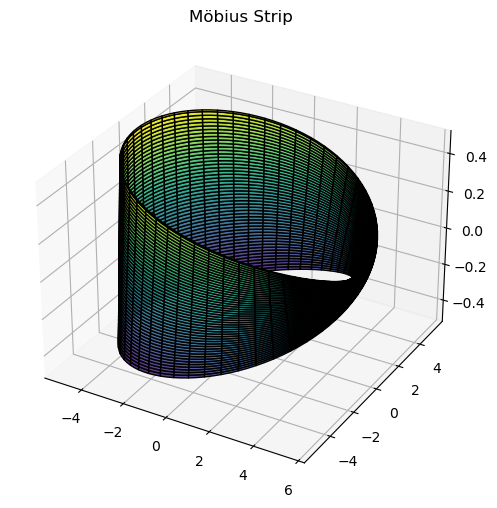

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def mobius_parametric(R, w, n):
    
    u = np.linspace(0, 2 * np.pi, n)
    v = np.linspace(-w / 2, w / 2, n)
    u, v = np.meshgrid(u, v)

    
    x = (R + v * np.cos(u / 2)) * np.cos(u)
    y = (R + v * np.cos(u / 2)) * np.sin(u)
    z = v * np.sin(u / 2)

    return x, y, z, u, v

def compute_surface_area(R, w, n):

    x, y, z, u, v = mobius_parametric(R, w, n)

  
    du = u[0, 1] - u[0, 0]
    dv = v[1, 0] - v[0, 0]

    xu = np.gradient(x, du, axis=1)
    xv = np.gradient(x, dv, axis=0)
    yu = np.gradient(y, du, axis=1)
    yv = np.gradient(y, dv, axis=0)
    zu = np.gradient(z, du, axis=1)
    zv = np.gradient(z, dv, axis=0)

   
    cross_x = yu * zv - zu * yv
    cross_y = zu * xv - xu * zv
    cross_z = xu * yv - yu * xv
    dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

    surface_area = np.sum(dA) * du * dv
    return surface_area

def compute_edge_length(R, w, n):
    
    u = np.linspace(0, 2 * np.pi, n)
    v = np.array([w / 2, -w / 2])  

    total_length = 0
    for vi in v:
        x = (R + vi * np.cos(u / 2)) * np.cos(u)
        y = (R + vi * np.cos(u / 2)) * np.sin(u)
        z = vi * np.sin(u / 2)
        dx = np.gradient(x)
        dy = np.gradient(y)
        dz = np.gradient(z)
        ds = np.sqrt(dx**2 + dy**2 + dz**2)
        total_length += np.sum(ds)

    return total_length

def plot_mobius(x, y, z):
   
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='k', alpha=0.9)
    ax.set_title("Möbius Strip")
    plt.show()

def main():

    R = float(input("Enter radius R (e.g. 5): "))
    w = float(input("Enter width w (e.g. 1): "))
    n = int(input("Enter resolution n (e.g. 100): "))


    x, y, z, _, _ = mobius_parametric(R, w, n)

  
    area = compute_surface_area(R, w, n)
    edge_len = compute_edge_length(R, w, n)

    print(f"Surface Area ≈ {area:.4f}")
    print(f"Edge Length ≈ {edge_len:.4f}")

    plot_mobius(x, y, z)

if __name__ == "__main__":
    main()
